In [1]:
import numpy as np
import matplotlib.pyplot as plt

from chem import script8

In [2]:
def force_function(q):
    """
    Force function for the harmonic oscillator.
    """
    return -q

def derivative_function(x):
    """
    Derivative of the force function.
    """
    return np.array([x[1], -x[0]])

In [3]:
x_0 = np.array([1.0, 0.0])
dt = 0.1
n_steps = 120

verlet_traj = script8.velocity_verlet(x_0, n_steps, dt, force_function)

fwd_euler_trajectory = script8.forward_euler_integrate(x_0, n_steps, dt, derivative_function)
bwd_euler_trajectory = script8.backward_euler_integrate(x_0, n_steps, dt, derivative_function)

true_solution = np.array([np.cos(np.arange(n_steps) * dt), np.sin(np.arange(n_steps) * dt)]).T

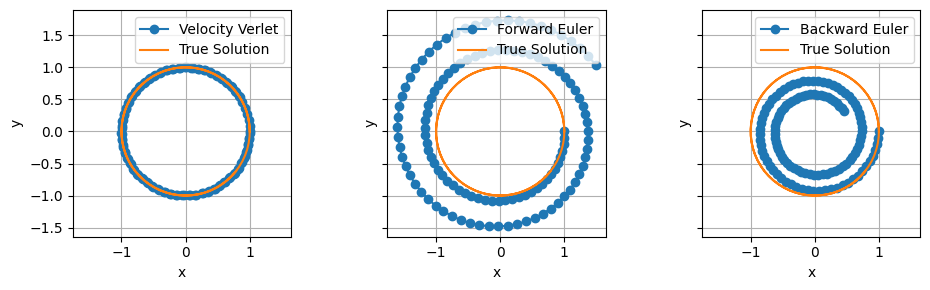

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)

axes[0].plot(verlet_traj[:, 0], verlet_traj[:, 1], label='Velocity Verlet', marker='o')
axes[0].plot(true_solution[:, 0], true_solution[:, 1], label='True Solution')
axes[1].plot(fwd_euler_trajectory[:, 0], fwd_euler_trajectory[:, 1], label='Forward Euler', marker='o')
axes[1].plot(true_solution[:, 0], true_solution[:, 1], label='True Solution')
axes[2].plot(bwd_euler_trajectory[:, 0], bwd_euler_trajectory[:, 1], label='Backward Euler', marker='o')
axes[2].plot(true_solution[:, 0], true_solution[:, 1], label='True Solution')

for ax in axes:
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()
plt.show()